In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("microbes.xlsx")
display(df)

,Domain,Family,Genus,Species,Gram Stain,Shape,Metabolism,pH Affinity,Temperature Affinity,Salt Tolerance,...,Toxin,Toxin Type,Spore Formation,Pathogen,Antibiotic Produced,Industrial Use,Motile,Pigment Production,Biosafety level,Foodborne
0,Bacteria,Acetobacteraceae,Acetobacter,aceti,Negative,Rod,Aerobe,Acidophile,Mesophile,Moderate,...,No,None,No,No,No,Yes,Yes,No,1,No
1,Bacteria,Alcaligenaceae,Alcaligenes,faecalis,Negative,Rod,Aerobe,Neutrophile,Mesophile,Moderate,...,No,None,No,Opportunistic,No,No,Yes,No,2,No
2,Bacteria,Bacillaceae,Bacillus,anthracis,Positive,Rod,Facultative Anaerobe,Neutrophile,Mesophile,Low,...,Yes,Exotoxin,Yes,Yes,No,No,No,No,3,No
3,Bacteria,Bacillaceae,Bacillus,cereus,Positive,Rod,Facultative Anaerobe,Neutrophile,Mesophile,Moderate,...,Yes,Exotoxin,Yes,Yes,Yes,Yes,Yes,No,2,Yes
4,Bacteria,Bacillaceae,Bacillus,halodurans,Positive,Rod,Aerobe,Alkaliphile,Mesophile,High,...,No,None,Yes,No,Yes,Yes,Yes,No,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Bacteria,Streptococcaceae,Streptococcus,pyogenes,Positive,Streptococcus,Facultative Anaerobe,Neutrophile,Mesophile,Low,...,Yes,Exotoxin,No,Yes,No,Yes,Yes,No,2,Yes
66,Bacteria,Streptococcaceae,Streptococcus,viridans,Positive,Streptococcus,Facultative Anaerobe,Neutrophile,Mesophile,Low,...,No,None,No,Opportunistic,No,Yes,Yes,No,2,No
67,Bacteria,Vibrionaceae,Vibrio,cholerae,Negative,Vibrio,Facultative Anaerobe,Alkaliphile,Mesophile,High,...,Yes,Exotoxin,No,Yes,No,Yes,Yes,No,2,Yes
68,Bacteria,Vibrionaceae,Vibrio,parahaemolyticus,Negative,Vibrio,Facultative Anaerobe,Alkaliphile,Mesophile,High,...,Yes,Exotoxin,No,Yes,No,Yes,Yes,No,2,Yes


In [3]:
# display(df.dtypes)

In [4]:
# Columns

columns = [col for col in df.columns]
row_size = len(columns) // 4

for i in range(4):
    print(columns[i * row_size : (i + 1) * row_size])

['Domain', 'Family', 'Genus', 'Species', 'Gram Stain']
['Shape', 'Metabolism', 'pH Affinity', 'Temperature Affinity', 'Salt Tolerance']
['GC Content', 'Toxin', 'Toxin Type', 'Spore Formation', 'Pathogen']
['Antibiotic Produced', 'Industrial Use', 'Motile', 'Pigment Production', 'Biosafety level']


In [5]:
family_all = df.groupby("Family").size()
multiple_family = family_all[family_all > 2].sort_values()

print(f"There are {len(multiple_family)} family occuring more than two\n")
print(multiple_family)

There are 9 family occuring more than two

Family
Corynebacteriaceae    3
Lactobacillaceae      3
Staphylococcaceae     3
Vibrionaceae          3
Clostridiaceae        4
Pseudomonadaceae      4
Streptococcaceae      5
Bacillaceae           8
Enterobacteriaceae    8
dtype: int64


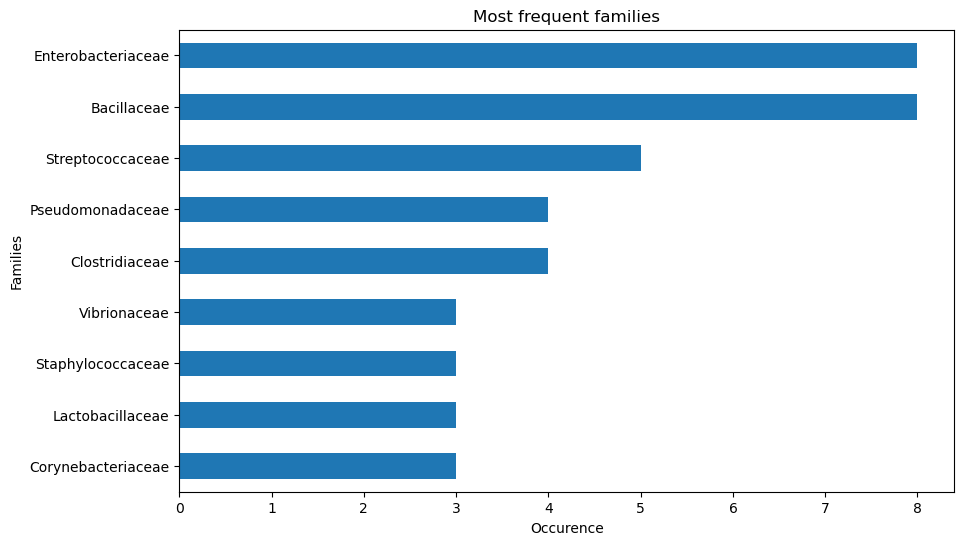

In [6]:
multiple_family.plot(
    kind="barh",
    figsize=(10, 6),
)
plt.title("Most frequent families")
plt.xlabel("Occurence")
plt.ylabel("Families")
plt.show()

In [7]:
genus_all = df.groupby("Genus").size()
multiple_genus = genus_all[genus_all > 2].sort_values()

print(f"There are {len(multiple_genus)} genera occuring more than two\n")
print(multiple_genus)

There are 8 genera occuring more than two

Genus
Corynebacterium    3
Lactobacillus      3
Staphylococcus     3
Vibrio             3
Clostridium        4
Pseudomonas        4
Streptococcus      5
Bacillus           6
dtype: int64


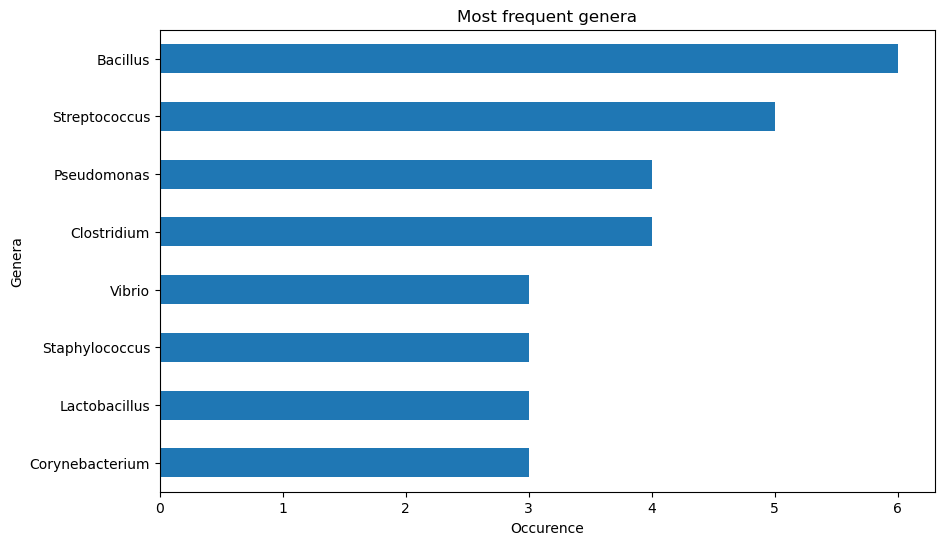

In [8]:
multiple_genus.plot(
    kind="barh",
    figsize=(10, 6),
)
plt.title("Most frequent genera")
plt.xlabel("Occurence")
plt.ylabel("Genera")
plt.show()

In [9]:
# Count Gram stain results

gram_stain = df.groupby("Gram Stain").size()


display(gram_stain)

Gram Stain
Negative    37
None         1
Positive    32
dtype: int64

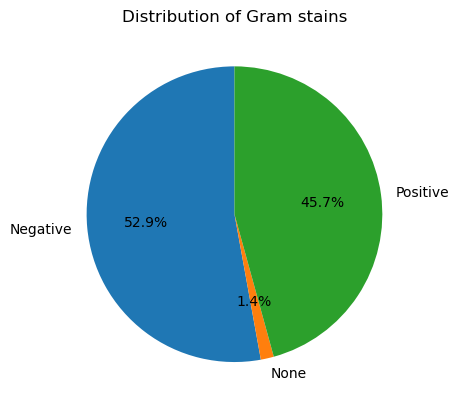

In [10]:
plt.pie(gram_stain, labels=gram_stain.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Gram stains")
plt.show()

In [11]:
# Get Gram positive rows

text_gram_positive = "Gram positives"
gram_positive = df[df["Gram Stain"] == "Positive"]
display(gram_positive.head(5))

,Domain,Family,Genus,Species,Gram Stain,Shape,Metabolism,pH Affinity,Temperature Affinity,Salt Tolerance,...,Toxin,Toxin Type,Spore Formation,Pathogen,Antibiotic Produced,Industrial Use,Motile,Pigment Production,Biosafety level,Foodborne
2,Bacteria,Bacillaceae,Bacillus,anthracis,Positive,Rod,Facultative Anaerobe,Neutrophile,Mesophile,Low,...,Yes,Exotoxin,Yes,Yes,No,No,No,No,3,No
3,Bacteria,Bacillaceae,Bacillus,cereus,Positive,Rod,Facultative Anaerobe,Neutrophile,Mesophile,Moderate,...,Yes,Exotoxin,Yes,Yes,Yes,Yes,Yes,No,2,Yes
4,Bacteria,Bacillaceae,Bacillus,halodurans,Positive,Rod,Aerobe,Alkaliphile,Mesophile,High,...,No,None,Yes,No,Yes,Yes,Yes,No,1,No
5,Bacteria,Bacillaceae,Priestia,megaterium,Positive,Rod,Aerobe,Neutrophile,Mesophile,Low,...,No,None,Yes,No,Yes,Yes,Yes,No,1,No
6,Bacteria,Bacillaceae,Bacillus,pumilus,Positive,Rod,Facultative Anaerobe,Neutrophile,Mesophile,Moderate,...,No,None,Yes,No,No,Yes,Yes,No,1,No


In [12]:
# Get Gram negative rows

text_gram_negative = "Gram negatives"
gram_negative = df[df["Gram Stain"] == "Negative"]
display(gram_negative.head(5))

,Domain,Family,Genus,Species,Gram Stain,Shape,Metabolism,pH Affinity,Temperature Affinity,Salt Tolerance,...,Toxin,Toxin Type,Spore Formation,Pathogen,Antibiotic Produced,Industrial Use,Motile,Pigment Production,Biosafety level,Foodborne
0,Bacteria,Acetobacteraceae,Acetobacter,aceti,Negative,Rod,Aerobe,Acidophile,Mesophile,Moderate,...,No,None,No,No,No,Yes,Yes,No,1,No
1,Bacteria,Alcaligenaceae,Alcaligenes,faecalis,Negative,Rod,Aerobe,Neutrophile,Mesophile,Moderate,...,No,None,No,Opportunistic,No,No,Yes,No,2,No
10,Bacteria,Campylobacteraceae,Campylobacter,jejuni,Negative,Spiral,Microaerophilic,Neutrophile,Thermophile,Low,...,Yes,Exotoxin,No,Yes,No,No,Yes,No,2,Yes
11,Bacteria,Campylobacteraceae,Helicobacter,pylori,Negative,Spiral,Microaerophilic,Acidophile,Mesophile,Low,...,Yes,Exotoxin,No,Yes,No,No,Yes,No,2,No
12,Bacteria,Chromobacteriaceae,Chromobacterium,violaceum,Negative,Rod,Facultative Anaerobe,Neutrophile,Mesophile,Low,...,Yes,Exotoxin,No,Yes,Yes,Yes,Yes,Violet,2,No


In [13]:
# Split pH values into 2 columns, and convert to number

df[["pH Lower", "pH Upper"]] = df["pH Range"].str.split("-", expand=True)

df["pH Lower"] = pd.to_numeric(df["pH Lower"])
df["pH Upper"] = pd.to_numeric(df["pH Upper"])

KeyError: 'pH Range'

In [14]:
# Get row with pH lower than 6

text_acid_tolerant = "Can reproduce: pH < 6"
acid_tolerant = df[df["pH Lower"] < 6]


print(f"Match count: {acid_tolerant.shape[0]}")


display(acid_tolerant.head(5))

Match count: 9


,Family,Genus,Species,Gram Stain,Size,Shape,Metabolism,pH Range,Temp. Range,Salt Tolerance,...,Spore Formation,Pathogen,Antibiotic Produced,Industrial Use,Motile,Color or Pigment Production,Mortality Rate,Foodborne,pH Lower,pH Upper
14,Chromobacteriaceae,Chromobacterium,violaceum,Negative,1-3,Rod,Facultative Anaerobe,5-9,20-37,Low,...,No,Yes,Yes,Yes,Yes,Purple-Violet (Violacein),Moderate,No,5,9
15,Clostridiaceae,Clostridium,botulinum,Positive,4-6,Rod,Anaerobe,4-7,20-37,Low,...,Yes,Yes,No,Yes,No,No,High,Yes,4,7
29,Lactobacillaceae,Lactobacillus,acidophilus,Positive,1-2,Rod,Facultative Anaerobe,4-7,30-37,Low,...,No,No,No,Yes,No,No,Low,Yes,4,7
30,Lactobacillaceae,Lactobacillus,plantarum,Positive,1-2,Rod,Facultative Anaerobe,4-7,20-37,Low,...,No,No,No,Yes,No,No,Low,Yes,4,7
31,Lactobacillaceae,Lactobacillus,reuteri,Positive,1-2,Rod,Facultative Anaerobe,4-7,20-37,Low,...,No,No,No,Yes,No,No,Low,Yes,4,7


In [15]:
# Get row with pH higher than 8

text_base_tolerant = "Can reproduce: pH > 8"
base_tolerant = df[df["pH Upper"] > 8]


print(f"Match count: {base_tolerant.shape[0]}")


display(base_tolerant.head(5))

Match count: 14


,Family,Genus,Species,Gram Stain,Size,Shape,Metabolism,pH Range,Temp. Range,Salt Tolerance,...,Spore Formation,Pathogen,Antibiotic Produced,Industrial Use,Motile,Color or Pigment Production,Mortality Rate,Foodborne,pH Lower,pH Upper
7,Bacillaceae,Bacillus,halodurans,Positive,2-5,Rod,Aerobe,6-10,20-50,High,...,Yes,No,Yes,Yes,Yes,No,Low,No,6,10
14,Chromobacteriaceae,Chromobacterium,violaceum,Negative,1-3,Rod,Facultative Anaerobe,5-9,20-37,Low,...,No,Yes,Yes,Yes,Yes,Purple-Violet (Violacein),Moderate,No,5,9
25,Halobacteriaceae,Halobacterium,salinarum,Negative,1-2,Rod,Aerobe,6-9,35-50,High,...,No,No,No,Yes,Yes,Red (Bacterioruberin),Low,No,6,9
26,Halomonadaceae,Halomonas,elongata,Negative,1-2,Rod,Facultative Anaerobe,6-9,20-40,High,...,No,No,No,Yes,Yes,No,Low,No,6,9
33,Listeriaceae,Listeria,monocytogenes,Positive,1-2,Rod,Facultative Anaerobe,4-9,1-45,Moderate,...,No,Yes,No,Yes,Yes,No,Moderate,Yes,4,9


In [16]:
# Split temp values into 2 columns, and convert to number

df[["Temp Lower", "Temp Upper"]] = df["Temp. Range"].str.split("-", expand=True)

df["Temp Lower"] = pd.to_numeric(df["Temp Lower"])
df["Temp Upper"] = pd.to_numeric(df["Temp Upper"])

In [17]:
# Get rows with temperature lower than 25

text_low_temp_tolerant = "Can reproduce: Temperature < 25°C"
low_temp_tolerant = df[df["Temp Lower"] < 25]


print(f"Match count: {low_temp_tolerant.shape[0]}")


display(low_temp_tolerant.head(5))

Match count: 27


,Family,Genus,Species,Gram Stain,Size,Shape,Metabolism,pH Range,Temp. Range,Salt Tolerance,...,Antibiotic Produced,Industrial Use,Motile,Color or Pigment Production,Mortality Rate,Foodborne,pH Lower,pH Upper,Temp Lower,Temp Upper
6,Bacillaceae,Bacillus,cereus,Positive,2-4,Rod,Facultative Anaerobe,6-8,20-37,Moderate,...,No,Yes,Yes,No,Moderate,Yes,6,8,20,37
7,Bacillaceae,Bacillus,halodurans,Positive,2-5,Rod,Aerobe,6-10,20-50,High,...,Yes,Yes,Yes,No,Low,No,6,10,20,50
12,Bacillaceae,Bacillus,thuringiensis,Positive,2-4,Rod,Facultative Anaerobe,6-8,20-37,Low,...,Yes,Yes,Yes,No,Low,No,6,8,20,37
14,Chromobacteriaceae,Chromobacterium,violaceum,Negative,1-3,Rod,Facultative Anaerobe,5-9,20-37,Low,...,Yes,Yes,Yes,Purple-Violet (Violacein),Moderate,No,5,9,20,37
15,Clostridiaceae,Clostridium,botulinum,Positive,4-6,Rod,Anaerobe,4-7,20-37,Low,...,No,Yes,No,No,High,Yes,4,7,20,37


In [18]:
# Get rows with temperature higher than 40

text_high_temp_tolerant = "Can reproduce: Temperature > 40°C"
high_temp_tolerant = df[df["Temp Upper"] > 40]


print(f"Match count: {high_temp_tolerant.shape[0]}")


display(high_temp_tolerant.head(5))

Match count: 12


,Family,Genus,Species,Gram Stain,Size,Shape,Metabolism,pH Range,Temp. Range,Salt Tolerance,...,Antibiotic Produced,Industrial Use,Motile,Color or Pigment Production,Mortality Rate,Foodborne,pH Lower,pH Upper,Temp Lower,Temp Upper
1,Actinobacteria,Actinobacteria,thermophila,Positive,2-4,Rod,Aerobe,6-8,45-60,Moderate,...,No,Yes,No,No,Low,No,6,8,45,60
5,Bacillaceae,Bacillus,caldotenax,Positive,2-4,Rod,Aerobe,6-8,50-70,Low,...,Yes,Yes,Yes,No,Low,No,6,8,50,70
7,Bacillaceae,Bacillus,halodurans,Positive,2-5,Rod,Aerobe,6-10,20-50,High,...,Yes,Yes,Yes,No,Low,No,6,10,20,50
10,Bacillaceae,Bacillus,stearothermophilus,Positive,3-5,Rod,Aerobe,6-8,50-65,Low,...,Yes,Yes,Yes,No,Low,No,6,8,50,65
13,Campylobacteraceae,Campylobacter,jejuni,Negative,1-2,Spiral,Microaerophilic,6-8,37-42,Low,...,No,No,Yes,No,Moderate,Yes,6,8,37,42


In [19]:
text_less_than_40_gc_content = "GC content <= 40%"
less_than_40_gc_content = df[df["GC Content"] <= 40]

text_between_40_60_gc_content = "40% < GC content < 60%"
between_40_60_gc_content = df[(df["GC Content"] > 40) & (df["GC Content"] < 60)]

text_more_than_60_gc_content = "GC content >= 60%"
more_than_60_gc_content = df[df["GC Content"] >= 60]

display(more_than_60_gc_content[["Genus", "Species", "GC Content"]].head(5))

,Genus,Species,GC Content
1,Actinobacteria,thermophila,68.0
2,Actinopolyspora,propionica,68.0
14,Chromobacterium,violaceum,64.0
19,Corynebacterium,jeikeium,60.0
20,Corynebacterium,urolithicum,61.0


In [20]:
shapes = df.groupby("Shape").size()
print(shapes)

Shape
Pleomorphic     1
Rod            53
Sphere         13
Spiral          7
dtype: int64


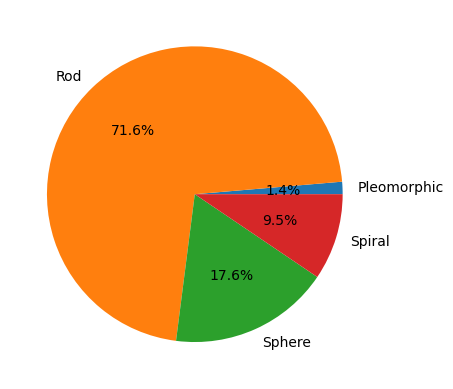

In [21]:
plt.pie(shapes, labels=shapes.index, autopct="%1.1f%%", startangle=0)
plt.show()

In [22]:
text_shape_rod = "Shape: Rod"
shape_rod = df[df["Shape"] == "Rod"]
display(shape_rod.head(5))

,Family,Genus,Species,Gram Stain,Size,Shape,Metabolism,pH Range,Temp. Range,Salt Tolerance,...,Antibiotic Produced,Industrial Use,Motile,Color or Pigment Production,Mortality Rate,Foodborne,pH Lower,pH Upper,Temp Lower,Temp Upper
0,Moraxellaceae,Acinetobacter,baumannii,Negative,1-2,Rod,Aerobe,6-8,30-37,Moderate,...,No,No,No,No,Moderate,No,6,8,30,37
1,Actinobacteria,Actinobacteria,thermophila,Positive,2-4,Rod,Aerobe,6-8,45-60,Moderate,...,No,Yes,No,No,Low,No,6,8,45,60
2,Actinomycetaceae,Actinopolyspora,propionica,Positive,2-4,Rod,Aerobe,6-8,25-37,High,...,Yes,Yes,No,No,Low,No,6,8,25,37
3,Alcaligenaceae,Alcaligenes,faecalis,Negative,1-2,Rod,Aerobe,6-8,30-37,Moderate,...,No,No,Yes,No,Low,No,6,8,30,37
4,Bacillaceae,Bacillus,anthracis,Positive,2-4,Rod,Aerobe,6-8,30-37,Low,...,Yes,Yes,No,No,High,No,6,8,30,37


In [23]:
text_shape_sphere = "Shape: Sphere"
shape_sphere = df[df["Shape"] == "Sphere"]
display(shape_sphere.head(5))

,Family,Genus,Species,Gram Stain,Size,Shape,Metabolism,pH Range,Temp. Range,Salt Tolerance,...,Antibiotic Produced,Industrial Use,Motile,Color or Pigment Production,Mortality Rate,Foodborne,pH Lower,pH Upper,Temp Lower,Temp Upper
34,Micrococcaceae,Micrococcus,luteus,Positive,1-3,Sphere,Aerobe,6-8,20-37,Low,...,No,No,No,Yellow,Low,No,6,8,20,37
35,Moraxellaceae,Moraxella,catarrhalis,Negative,1-2,Sphere,Aerobe,6-8,35-37,Low,...,No,No,No,No,Low,No,6,8,35,37
38,Neisseriaceae,Neisseria,gonorrhoeae,Negative,1-2,Sphere,Aerobe,6-8,35-37,Low,...,No,No,No,No,Low,No,6,8,35,37
39,Neisseriaceae,Neisseria,mucosa,Negative,1-2,Sphere,Aerobe,6-8,35-37,Low,...,No,No,No,No,Low,No,6,8,35,37
59,Staphylococcaceae,Staphylococcus,aureus,Positive,1-2,Sphere,Facultative Anaerobe,4-9,15-45,Moderate,...,No,Yes,No,Golden Pigment,Moderate,Yes,4,9,15,45


In [24]:
text_shape_spiral = "Shape: Spiral"
shape_spiral = df[df["Shape"] == "Spiral"]
display(shape_spiral.head(5))

,Family,Genus,Species,Gram Stain,Size,Shape,Metabolism,pH Range,Temp. Range,Salt Tolerance,...,Antibiotic Produced,Industrial Use,Motile,Color or Pigment Production,Mortality Rate,Foodborne,pH Lower,pH Upper,Temp Lower,Temp Upper
13,Campylobacteraceae,Campylobacter,jejuni,Negative,1-2,Spiral,Microaerophilic,6-8,37-42,Low,...,No,No,Yes,No,Moderate,Yes,6,8,37,42
27,Campylobacteraceae,Helicobacter,pylori,Negative,2-4,Spiral,Microaerophilic,6-8,30-37,Low,...,No,No,Yes,No,Moderate,No,6,8,30,37
32,Leptospiraceae,Leptospira,interrogans,Negative,10-20,Spiral,Aerobe,7-8,28-30,Low,...,No,No,Yes,No,Moderate,No,7,8,28,30
51,Rhodospirillaceae,Rhodospirillum,rubrum,Negative,1-2,Spiral,Facultative Anaerobe,6-8,20-30,Moderate,...,No,Yes,Yes,Red,Low,No,6,8,20,30
57,Spirillaceae,Spirillum,volutans,Negative,10-60,Spiral,Microaerophilic,7-8,25-30,Low,...,No,No,Yes,No,Low,No,7,8,25,30


In [25]:
print(df[df["Genome Size"] <= 3].shape[0])
print(df[(df["Genome Size"] > 3) & (df["Genome Size"] < 5)].shape[0])
print(df[df["Genome Size"] >= 5].shape[0])

25
28
19


In [26]:
properties = [
    (text_gram_positive, gram_positive),
    (text_gram_negative, gram_negative),
    (text_acid_tolerant, acid_tolerant),
    (text_base_tolerant, base_tolerant),
    (text_low_temp_tolerant, low_temp_tolerant),
    (text_high_temp_tolerant, high_temp_tolerant),
    (text_less_than_40_gc_content, less_than_40_gc_content),
    (text_between_40_60_gc_content, between_40_60_gc_content),
    (text_more_than_60_gc_content, more_than_60_gc_content),
    (text_shape_rod, shape_rod),
    (text_shape_sphere, shape_sphere),
    (text_shape_spiral, shape_spiral),
]

In [27]:
def get_property_intersection(prop1, prop2):
    return pd.merge(prop1, prop2)

In [28]:
def get_working_pairs(props):
    working_pairs = []

    for i, prop1 in enumerate(props):
        for j, prop2 in enumerate(props):
            if j > i:
                merged_df = get_property_intersection(prop1[1], prop2[1])
                if merged_df.shape[0] > 4:
                    merged_df_length = merged_df.shape[0]
                    working_pairs.append((prop1, prop2, merged_df, merged_df_length))

    return working_pairs

In [29]:
working_pairs = get_working_pairs(properties)

for pair in working_pairs:
    print(f"{pair[0][0]} with {pair[1][0]} (length: {pair[3]})")

Gram positives with Can reproduce: pH < 6 (length: 7)
Gram positives with Can reproduce: Temperature < 25°C (length: 12)
Gram positives with Can reproduce: Temperature > 40°C (length: 8)
Gram positives with GC content <= 40% (length: 20)
Gram positives with 40% < GC content < 60% (length: 6)
Gram positives with GC content >= 60% (length: 9)
Gram positives with Shape: Rod (length: 27)
Gram positives with Shape: Sphere (length: 9)
Gram negatives with Can reproduce: pH > 8 (length: 11)
Gram negatives with Can reproduce: Temperature < 25°C (length: 15)
Gram negatives with GC content <= 40% (length: 7)
Gram negatives with 40% < GC content < 60% (length: 22)
Gram negatives with GC content >= 60% (length: 8)
Gram negatives with Shape: Rod (length: 26)
Gram negatives with Shape: Spiral (length: 7)
Can reproduce: pH < 6 with Can reproduce: Temperature < 25°C (length: 7)
Can reproduce: pH < 6 with GC content <= 40% (length: 5)
Can reproduce: pH < 6 with Shape: Rod (length: 8)
Can reproduce: pH >